In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/california_housing_test.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [4]:
#Drop rows with any NaN values
df_cleaned = df.dropna()

#Drop columns with any NaN values
df_cleaned_cols = df.dropna(axis=1)

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df_imputed)

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  median_house_value

Linear Regression train MSE:  1.2324892812403194
Linear Regression train R2:  0.6509965496966991
Linear Regression test MSE:  1.0437535746915636
Linear Regression test R2:  0.657875409905947
Random Forest train MSE:  1.9236318390160205
Random Forest train R2:  0.4552860141272338
Random Forest test MSE:  1.6892604612380373
Random Forest test r2:  0.4462892804616845


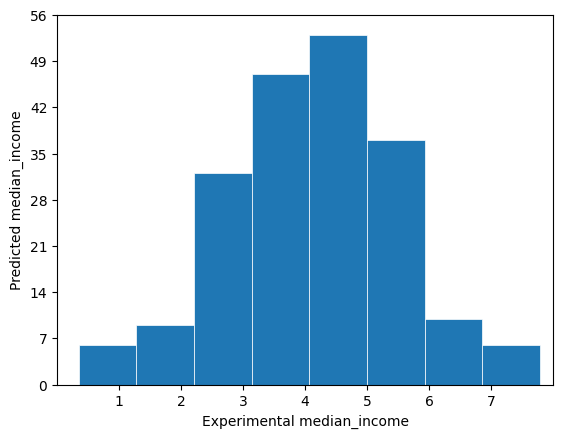

In [7]:
y = df['median_income']
y
x = df.drop('median_income', axis=1)
x

#splitting data into traning and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

#BUILDING MODEL
#using Linear Regression to build the model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

#prediction
y_linreg_train_pred = linreg.predict(x_train)
y_linreg_test_pred = linreg.predict(x_test)
y_linreg_train_pred
y_linreg_test_pred

#evaluating model preferences
from sklearn.metrics import mean_squared_error, r2_score
linreg_train_mse = mean_squared_error(y_train, y_linreg_train_pred)
linreg_train_r2 = r2_score(y_train, y_linreg_train_pred)

linreg_test_mse = mean_squared_error(y_test, y_linreg_test_pred)
linreg_test_r2= r2_score(y_test, y_linreg_test_pred)

print("Linear Regression train MSE: ", linreg_train_mse)
print("Linear Regression train R2: ", linreg_train_r2)
print("Linear Regression test MSE: ", linreg_test_mse)
print("Linear Regression test R2: ", linreg_test_r2)

linreg_results = pd.DataFrame(['Linear Regression', linreg_train_mse, linreg_train_r2, linreg_test_mse, linreg_test_r2]).transpose()
linreg_results.columns = ['Method','Training MSE','Training R2', 'Testing MSE', 'Testing R2']
linreg_results

#using Random Forest to train the model now
from sklearn.ensemble import RandomForestRegressor
ranfor = RandomForestRegressor(max_depth=2, random_state=100)
ranfor.fit(x_train, y_train)

#prediction
y_ranfor_train_pred = ranfor.predict(x_train)
y_ranfor_test_pred = ranfor.predict(x_test)
y_ranfor_train_pred
y_ranfor_test_pred

#evaluating model preferences
from sklearn.metrics import mean_squared_error, r2_score
ranfor_train_mse = mean_squared_error(y_train, y_ranfor_train_pred)
ranfor_train_r2 = r2_score(y_train, y_ranfor_train_pred)

ranfor_test_mse = mean_squared_error(y_test, y_ranfor_test_pred)
ranfor_test_r2= r2_score(y_test, y_ranfor_test_pred)

print("Random Forest train MSE: ", ranfor_train_mse)
print("Random Forest train R2: ", ranfor_train_r2)
print("Random Forest test MSE: ", ranfor_test_mse)
print("Random Forest test r2: ", ranfor_test_r2)

ranfor_results = pd.DataFrame(['Random Forest', ranfor_train_mse, ranfor_train_r2, ranfor_test_mse, ranfor_test_r2]).transpose()
ranfor_results.columns = ['Method','Training MSE','Training R2', 'Testing MSE', 'Testing R2']
ranfor_results

#combining above tables together
df_models = pd.concat([linreg_results, ranfor_results], axis=0)
df_models.reset_index(drop=True)

#visualizing
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)
#plot:
fig, ax = plt.subplots()
ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")
ax.set(xlim=(0, 8), xticks=np.arange(1, 8), ylim=(0, 56), yticks=np.linspace(0, 56, 9))
plt.xlabel('Experimental median_income')
plt.ylabel('Predicted median_income')
plt.show()

